In [1]:
import numpy as np
from sympy import *
import networkx as nx

Choose $N, K$ and $M$. We compute $S$ = nb of states (=cardinal of state-space) and `users`=iterator over set of users.

In [2]:
N = 2 # nb users
users = range(N)
K = 1
M = 1
S = (K+1)**2 * (M+1)**2

Create $\lambda$s and $\mu$s.

In [3]:
lambd = { 0:Symbol('La'), 1:Symbol('Lb')}
mu = { 0:Symbol('Ma'), 1:Symbol('Mb')}

We define the transition rate from a state `start` to a state `end`.

In [4]:
def transition_rate(start, end):

    # get init values of walls and newsfeeds
    w0, n0, w1, n1 = start[0], start[1], start[2], start[3]
    
    # movement
    z = list(np.array(end) - np.array(start))
    
    # case w0 +1
    if z == [1,0,0,0]:
        return (lambd[0] + mu[0]*n0/M) * (1-w0/K) * n1/M
    # case n1 +1
    elif z == [0,0,0,1]:
        return (lambd[0] + mu[0]*n0/M)  * w0/K * (1-n1/M)
    # case w0 +1 & n1 +1
    elif z == [1,0,0,1]:
        return (lambd[0] + mu[0]*n0/M) * (1-w0/K) * (1-n1/M)
    
    # case w0 -1
    elif z == [-1,0,0,0]:
        return mu[0] * (1-n0/M) * w0/K * (1-n1/M)
    # case n1 -1
    elif z == [0,0,0,-1]:
        return mu[0] * (1-n0/M) * (1-w0/K) * n1/M
    # case w0 -1 & n1 -1
    elif z == [-1,0,0,-1]:
        return mu[0] * (1-n0/M) * w0/K * n1/M
    
    # case w1 +1
    elif z == [0,0,1,0]:
        return mu[1] * n1/M * (1-w1/K) * n0/M
    # case n0 +1
    elif z == [0,1,0,0]:
        return mu[1] * n1/M * w1/K * (1-n0/M)
    # case w1 +1 & n0 +1
    elif z == [0,1,1,0]:
        return mu[1] * n1/M * (1-w1/K) * (1-n0/M)
        
    # case w1 -1
    elif z == [0,0,-1,0]:
        return (lambd[1] + mu[1]*(1-n1/M)) * w1/K * (1-n0/M)
    # case n0 -1
    elif z == [0,-1,0,0]:
        return (lambd[1] + mu[1]*(1-n1/M)) * (1-w1/K) * n0/M
    # case w1 -1
    elif z == [0,-1,-1,0]:
        return (lambd[1] + mu[1]*(1-n1/M)) * w1/K * n0/M
        
    # otherwise rate=0
    else:
        return 0

Create $Q$ (rate matrix). Make a copy as $Q_{theo}$ to keep original expressions.

In [5]:
Q = list()
for k1 in range(K+1):
    for k2 in range(M+1):
        for m2 in range(K+1):
            for m1 in range(M+1):
                Q.append(list())
                for k1_ in range(K+1):
                    for k2_ in range(M+1):
                        for m2_ in range(K+1):
                            for m1_ in range(M+1):
                                Q[-1].append(Symbol('q_%d%d%d%d^%d%d%d%d'%(k1, m1, k2, m2, k1_, m1_, k2_, m2_)))
Q = Matrix(Q)
Q_theo = Matrix(Q)

Fill $Q$ matrix with transition rates.

In [6]:
# iterate over Q matrix
for i in range(S):
    for j in range(S):
    
        # x=start, y=end
        x = [ int(xi) for xi in Q[i,j].name[2:6] ]
        y = [ int(yi) for yi in Q[i,j].name[-4:] ]

        # compute transition rate
        expr = transition_rate(x, y)
    
        # put new value in Q
        Q[i,j] = simplify(expr)
        
# now add diagonal values
for i in range(S):
    Q[i,i] = simplify(-sum(Q[i,:]))

In [7]:
for i,q in enumerate(Q):
    if q != 0:
        print(Q_theo[i], q)

q_0000^0000 -1.0*La
q_0000^1001 1.0*La
q_0100^0000 1.0*Lb + 1.0*Mb
q_0100^0100 -1.0*La - 1.0*Lb - 1.0*Ma - 1.0*Mb
q_0100^1101 1.0*La + 1.0*Ma
q_0001^0000 1.0*Ma
q_0001^0001 -1.0*La - 1.0*Ma - 1.0*Mb
q_0001^0111 1.0*Mb
q_0001^1001 1.0*La
q_0101^0001 1.0*Lb
q_0101^0101 -1.0*La - 1.0*Lb - 1.0*Ma - 1.0*Mb
q_0101^0111 1.0*Mb
q_0101^1101 1.0*La + 1.0*Ma
q_0010^0000 1.0*Lb + 1.0*Mb
q_0010^0010 -1.0*La - 1.0*Lb - 1.0*Mb
q_0010^1011 1.0*La
q_0110^0000 Lb + 1.0*Mb
q_0110^0110 -1.0*La - 1.0*Lb - 1.0*Ma - 1.0*Mb
q_0110^1111 1.0*La + 1.0*Ma
q_0011^0001 1.0*Lb
q_0011^0010 1.0*Ma
q_0011^0011 -1.0*La - 1.0*Lb - 1.0*Ma - 1.0*Mb
q_0011^0111 1.0*Mb
q_0011^1011 1.0*La
q_0111^0001 Lb
q_0111^0111 -1.0*La - 1.0*Lb - 1.0*Ma
q_0111^1111 1.0*La + 1.0*Ma
q_1000^0000 1.0*Ma
q_1000^1000 -1.0*La - 1.0*Ma
q_1000^1001 1.0*La
q_1100^1000 1.0*Lb + 1.0*Mb
q_1100^1100 -1.0*La - 1.0*Lb - 1.0*Ma - 1.0*Mb
q_1100^1101 1.0*La + 1.0*Ma
q_1001^0000 1.0*Ma
q_1001^1001 -1.0*Ma - 1.0*Mb
q_1001^1111 1.0*Mb
q_1101^1001 1.0*Lb
q_1101

Create $U$ (vector of stationary probability).

In [8]:
U = list()    
for k1 in range(K+1):
    for k2 in range(M+1):
        for m2 in range(K+1):
            for m1 in range(M+1):
                U.append(Symbol('Pi_%d%d%d%d'%(k1, m1, k2, m2)))
# U = Matrix([U])

In [9]:
U

[Pi_0000,
 Pi_0100,
 Pi_0001,
 Pi_0101,
 Pi_0010,
 Pi_0110,
 Pi_0011,
 Pi_0111,
 Pi_1000,
 Pi_1100,
 Pi_1001,
 Pi_1101,
 Pi_1010,
 Pi_1110,
 Pi_1011,
 Pi_1111]

Define $Q_{aug}$ as $Q^T$ with row $(1, ...,1)$ added at the end, and $b=(0,...,0,1)^T$ so that we can resolve $Q_{aug}U^T=b$ (equivalent $UQ_{aug}=b$) instead of $\left\{UQ=0, Ue=1\right\}$. 

**Important :** $Q$ is overranked so we delete $Q_{aug}$'s first line and the first line of $b$.

In [27]:
Q_aug = Q.T[1:,:]
Q_aug = Q_aug.row_insert(S-1, Matrix([[1]*S]))
b = Matrix([0]*S + [1])
b = b[1:,:]

Solve $Q_{aug}U^T=b$.

In [28]:
sol = linsolve((Q_aug, b), U)

In [30]:
for S in sol:
    for i,s in enumerate(S):
        print(U[i], s)

Pi_0000 1.0*Lb*Ma/(La*Lb + La*Mb + Lb*Ma)
Pi_0100 0
Pi_0001 0
Pi_0101 0
Pi_0010 0
Pi_0110 0
Pi_0011 0
Pi_0111 0
Pi_1000 0
Pi_1100 0
Pi_1001 1.0*La*Lb/(La*Lb + La*Mb + Lb*Ma)
Pi_1101 0
Pi_1010 0
Pi_1110 0
Pi_1011 0
Pi_1111 1.0*La*Mb/(La*Lb + La*Mb + Lb*Ma)


## Graphe

In [10]:
G = nx.DiGraph()

In [11]:
for i in range(Q_theo.shape[0]):
    for j in range(Q_theo.shape[1]):
        if Q[i,j] != 0:
            u = Q_theo[i,j].name[2:6]
            v = Q_theo[i,j].name[-4:]
            weight = Q[i,j]
            G.add_edge(u, v, weight=weight)

Remove impossible states: $K--0$, $0--M$, $-M0-$ and $-0K-$.

In [118]:
Gnodes_copy = iter(list(G.nodes))
for node in Gnodes_copy:
    if int(node[3]) - int(node[0]) == M:
        G.remove_node(node)
    elif int(node[0]) - int(node[3]) == K:
        G.remove_node(node)
    elif int(node[1]) - int(node[2]) == M:
        G.remove_node(node)
    elif int(node[2]) - int(node[1]) == K:
        G.remove_node(node)

Print strongly connected components.

In [12]:
for scc in nx.strongly_connected_components(G):
    print(len(scc), scc)
    if len(scc)==1:
        n = list(scc)[0]
        leaders = set(G.predecessors(n))
        followers = set(G.successors(n))
        print("leaders: {}, followers: {}".format(leaders, followers))
    print()

3 {'1001', '0000', '1111'}

1 {'1101'}
leaders: {'1100', '1101', '0101', '0100'}, followers: {'1001', '1111', '1101'}

1 {'0100'}
leaders: {'0100'}, followers: {'0000', '1101', '0100'}

2 {'0001', '0111'}

1 {'0101'}
leaders: {'0101'}, followers: {'0001', '0111', '1101', '0101'}

2 {'0010', '1011'}

1 {'0110'}
leaders: {'0110'}, followers: {'1111', '0000', '0110'}

1 {'0011'}
leaders: {'0011'}, followers: {'0001', '0111', '1011', '0011', '0010'}

1 {'1000'}
leaders: {'1110', '1010', '1000', '1100'}, followers: {'1001', '0000', '1000'}

1 {'1100'}
leaders: {'1100'}, followers: {'1101', '1000', '1100'}

1 {'1010'}
leaders: {'1010'}, followers: {'0010', '1010', '1011', '1000'}

1 {'1110'}
leaders: {'1110'}, followers: {'1110', '1111', '1000'}



In [74]:
SCC = dict()
pure_nodes = set()
i = 0
for scc in nx.strongly_connected_component_subgraphs(G):
    if scc.number_of_nodes() > 1:
        SCC[i] = scc
        i += 1
    else:
        pure_nodes.add(list(scc)[0])

newG = nx.DiGraph(G.subgraph(pure_nodes))
newG.add_node('A0')

for node in pure_nodes:
        for n in SCC[i].nodes:
            if n in G.predecessors(node):
                newG.add_edge(scc, node)
                print("A{} --> {}".format(i, node))
            if n in G.successors(node):
                newG.add_edge(node, scc)
                print("{} --> A{}".format(node, i))

1220 --> A0
1220 --> A0
1220 --> A0
0220 --> A0
0220 --> A0
1210 --> A0
1210 --> A0
1210 --> A0
1210 --> A0
0210 --> A0
0210 --> A0
0210 --> A0


In [14]:
nx.draw_shell(G, with_labels=True)

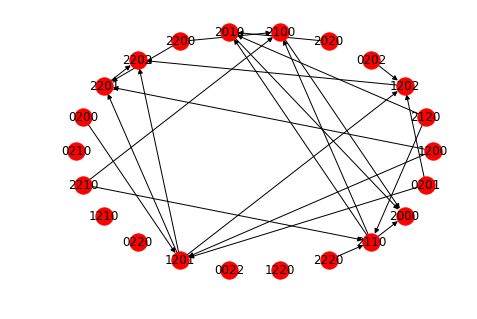

In [53]:
nx.draw_shell(G.subgraph(pure_nodes), with_labels=True)

{'0000': Text(1.0, -3.849302210312544e-09, '0000'),
 '1001': Text(0.9238795042037964, 0.3826834559440613, '1001'),
 '0100': Text(0.7071067690849304, 0.7071067690849304, '0100'),
 '1101': Text(0.3826834261417389, 0.9238795042037964, '1101'),
 '0001': Text(-4.172473211383476e-08, 1.0, '0001'),
 '0111': Text(-0.3826833963394165, 0.9238795638084412, '0111'),
 '0101': Text(-0.7071067690849304, 0.7071067690849304, '0101'),
 '0010': Text(-0.9238795042037964, 0.38268348574638367, '0010'),
 '1011': Text(-1.0, -9.127207789560998e-08, '1011'),
 '0110': Text(-0.9238795042037964, -0.3826834261417389, '0110'),
 '1111': Text(-0.7071068286895752, -0.7071067094802856, '1111'),
 '0011': Text(-0.38268357515335083, -0.9238795042037964, '0011'),
 '1000': Text(1.3911536811406222e-08, -1.0, '1000'),
 '1100': Text(0.3826836049556732, -0.9238794445991516, '1100'),
 '1010': Text(0.7071067094802856, -0.70710688829422, '1010'),
 '1110': Text(0.9238795638084412, -0.3826834261417389, '1110')}

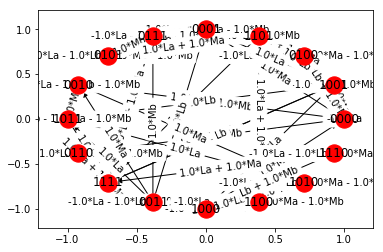

In [20]:
edge_labels = { e: G.edges[e]['weight'] for e in G.edges }
pos = nx.shell_layout(G)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
nx.draw_networkx_labels(G, pos)

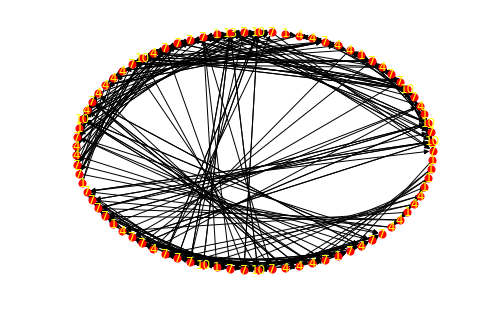

In [41]:
nx.draw_shell(G, node_size=50, font_color='yellow', labels={n:G.in_degree(n) for n in G.nodes})

In [31]:
indeg = {n: G.in_degree(n) for n in G.nodes}
outdeg = {n: G.out_degree(n) for n in G.nodes}

In [32]:
set(indeg.values())

{1, 4, 7, 10, 13}

In [33]:
set(outdeg.values())

{2, 3, 4, 5, 6, 7, 8, 9, 10, 13}

In [38]:
leaders = {n: set(G.predecessors(n)) for n in G.nodes}
followers = {n: set(G.successors(n)) for n in G.nodes}

In [41]:
for n in G.nodes:
    for m in G.nodes:
        if n!=m:
            if leaders[n] == leaders[m] and followers[n] == followers[m]:
                print(n,m)

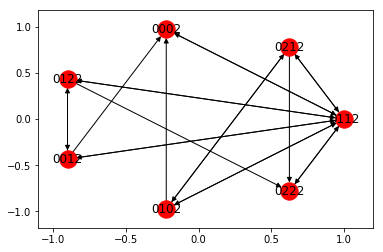

In [46]:
for g in nx.strongly_connected_component_subgraphs(G):
    if g.number_of_nodes() == 7:
        edge_labels = { e: g.edges[e]['weight'] for e in g.edges }
        pos = nx.shell_layout(g)
        nx.draw_networkx_nodes(g, pos)
        nx.draw_networkx_edges(g, pos)
#         nx.draw_networkx_edge_labels(g, pos, edge_labels=edge_labels)
        nx.draw_networkx_labels(g, pos)
        break